## Load data

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras

Using Theano backend.


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [5]:
datapath = '/media/sf_vmshared/timeseries/eecology/'

In [16]:
from keras.utils.np_utils import to_categorical

(1065, 20, 3)

In [18]:
ext = '.npz'
X_train = np.load(datapath+'X_train'+ext)['arr_0']
y_train_binary = to_categorical(np.load(datapath+'y_train'+ext)['arr_0'])
X_val = np.load(datapath+'X_val'+ext)['arr_0']
y_val_binary = to_categorical(np.load(datapath+'y_val'+ext)['arr_0'])
X_test = np.load(datapath+'X_test'+ext)['arr_0']
y_test_binary = to_categorical(np.load(datapath+'y_test'+ext)['arr_0'])

In [19]:
num_classes = y_train_binary.shape[1]
print(num_classes)

11


## Generate models

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam

In [26]:
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))

from mcfly import modelgen, find_architecture

In [73]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 10,
                                  #model_type = 'CNN',
                                  #cnn_max_layers=4,
                                  #deepconvlstm_max_conv_layers=3,
                                  #deepconvlstm_max_lstm_layers=2
                                 )

CPU times: user 2.69 s, sys: 20 ms, total: 2.71 s
Wall time: 3.18 s


In [74]:
for model, params, model_types in models:
    print(params)
    model.summary()

{'regularization_rate': 0.07314990143426885, 'fc_hidden_nodes': 72, 'filters': array([35, 78]), 'learning_rate': 0.0034899502531548147}
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_24 (BatchNormali(None, 20, 3)       6           batchnormalization_input_24[0][0]
____________________________________________________________________________________________________
convolution1d_23 (Convolution1D)   (None, 20, 35)      350         batchnormalization_24[0][0]      
____________________________________________________________________________________________________
activation_75 (Activation)         (None, 20, 35)      0           convolution1d_23[0][0]           
____________________________________________________________________________________________________
convolution1d_24 (Convolution1D)   (None, 20, 78)      8

## Compare models

In [75]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=20,
                                                                                  subset_size=1000,
                                                                                  verbose=True)

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 1s - loss: 5.9894 - acc: 0.4670 - val_loss: 0.9315 - val_acc: 0.8701
Epoch 2/20
1000/1000 [==============================] - 1s - loss: 2.2923 - acc: 0.5410 - val_loss: 1.0556 - val_acc: 0.7062
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 1.7854 - acc: 0.5530 - val_loss: 1.0280 - val_acc: 0.5198
Epoch 4/20
1000/1000 [==============================] - 1s - loss: 1.6384 - acc: 0.5510 - val_loss: 1.0645 - val_acc: 0.5480
Epoch 5/20
1000/1000 [==============================] - 1s - loss: 1.5232 - acc: 0.5600 - val_loss: 0.9501 - val_acc: 0.8079
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.4856 - acc: 0.5620 - val_loss: 1.0141 - val_acc: 0.5198
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.3945 - acc: 0.5840 - val_loss: 0.9514 - val_acc: 0.6723
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.3589 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 5s - loss: 7.4346 - acc: 0.3680 - val_loss: 1.4191 - val_acc: 0.4350
Epoch 2/20
1000/1000 [==============================] - 5s - loss: 5.4475 - acc: 0.5320 - val_loss: 1.0610 - val_acc: 0.6723
Epoch 3/20
1000/1000 [==============================] - 5s - loss: 4.2746 - acc: 0.6120 - val_loss: 0.9915 - val_acc: 0.7684
Epoch 4/20
1000/1000 [==============================] - 5s - loss: 3.6417 - acc: 0.6110 - val_loss: 0.8568 - val_acc: 0.8079
Epoch 5/20
1000/1000 [==============================] - 5s - loss: 3.1550 - acc: 0.6450 - val_loss: 0.6756 - val_acc: 0.9096
Epoch 6/20
1000/1000 [==============================] - 5s - loss: 2.7102 - acc: 0.6800 - val_loss: 0.6213 - val_acc: 0.9096
Epoch 7/20
1000/1000 [==============================] - 5s - loss: 2.5082 - acc: 0.6810 - val_loss: 0.5564 - val_acc: 0.9096
Epoch 8/20
1000/1000 [==============================] - 5s - loss: 2.2660 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 1s - loss: 4.9970 - acc: 0.3360 - val_loss: 1.5762 - val_acc: 0.3785
Epoch 2/20
1000/1000 [==============================] - 1s - loss: 2.2405 - acc: 0.4180 - val_loss: 1.3007 - val_acc: 0.3898
Epoch 3/20
1000/1000 [==============================] - 1s - loss: 1.8037 - acc: 0.5170 - val_loss: 1.0755 - val_acc: 0.4972
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.7212 - acc: 0.5120 - val_loss: 1.2563 - val_acc: 0.4294
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.5783 - acc: 0.5310 - val_loss: 1.0152 - val_acc: 0.4802
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.4984 - acc: 0.5440 - val_loss: 1.0076 - val_acc: 0.5198
Epoch 7/20
1000/1000 [==============================] - 1s - loss: 1.4671 - acc: 0.5380 - val_loss: 1.3417 - val_acc: 0.4294
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.4489 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 12.6826 - acc: 0.2330 - val_loss: 2.8748 - val_acc: 0.3616
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 3.6877 - acc: 0.3260 - val_loss: 1.7546 - val_acc: 0.3842
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 2.6075 - acc: 0.2390 - val_loss: 1.9959 - val_acc: 0.0452
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.8118 - acc: 0.4510 - val_loss: 1.3470 - val_acc: 0.4237
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.4681 - acc: 0.5160 - val_loss: 1.1703 - val_acc: 0.4576
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.4303 - acc: 0.5230 - val_loss: 1.2038 - val_acc: 0.5424
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.4522 - acc: 0.5390 - val_loss: 1.0675 - val_acc: 0.5989
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.4177 - a

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 3s - loss: 2.4790 - acc: 0.2880 - val_loss: 2.0868 - val_acc: 0.3672
Epoch 2/20
1000/1000 [==============================] - 3s - loss: 1.9259 - acc: 0.3290 - val_loss: 2.1057 - val_acc: 0.0678
Epoch 3/20
1000/1000 [==============================] - 3s - loss: 1.7817 - acc: 0.3530 - val_loss: 1.9427 - val_acc: 0.0791
Epoch 4/20
1000/1000 [==============================] - 3s - loss: 1.7768 - acc: 0.3530 - val_loss: 1.8631 - val_acc: 0.0791
Epoch 5/20
1000/1000 [==============================] - 3s - loss: 1.7428 - acc: 0.3740 - val_loss: 1.7374 - val_acc: 0.0565
Epoch 6/20
1000/1000 [==============================] - 4s - loss: 1.7010 - acc: 0.4420 - val_loss: 1.4789 - val_acc: 0.4294
Epoch 7/20
1000/1000 [==============================] - 4s - loss: 1.5535 - acc: 0.5040 - val_loss: 1.4712 - val_acc: 0.4689
Epoch 8/20
1000/1000 [==============================] - 4s - loss: 1.5195 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 7s - loss: 1.7271 - acc: 0.4040 - val_loss: 1.0257 - val_acc: 0.5932
Epoch 2/20
1000/1000 [==============================] - 8s - loss: 1.3301 - acc: 0.5830 - val_loss: 0.8726 - val_acc: 0.7119
Epoch 3/20
1000/1000 [==============================] - 11s - loss: 1.1121 - acc: 0.6440 - val_loss: 1.1092 - val_acc: 0.6215
Epoch 4/20
1000/1000 [==============================] - 10s - loss: 0.9711 - acc: 0.6870 - val_loss: 1.1300 - val_acc: 0.6102
Epoch 5/20
1000/1000 [==============================] - 10s - loss: 0.9216 - acc: 0.6850 - val_loss: 1.0115 - val_acc: 0.6610
Epoch 6/20
1000/1000 [==============================] - 7s - loss: 0.9505 - acc: 0.6880 - val_loss: 0.8600 - val_acc: 0.6893
Epoch 7/20
1000/1000 [==============================] - 6s - loss: 0.8305 - acc: 0.7210 - val_loss: 0.8958 - val_acc: 0.6836
Epoch 8/20
1000/1000 [==============================] - 8s - loss: 0.8621 -

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1000 samples, validate on 177 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 1.6373 - acc: 0.5080 - val_loss: 1.0151 - val_acc: 0.5932
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 1.1116 - acc: 0.6580 - val_loss: 0.8969 - val_acc: 0.7062
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.9874 - acc: 0.7070 - val_loss: 0.7787 - val_acc: 0.7175
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.8566 - acc: 0.7530 - val_loss: 0.7145 - val_acc: 0.8136
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.7757 - acc: 0.7800 - val_loss: 0.8800 - val_acc: 0.7175
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.7183 - acc: 0.7930 - val_loss: 0.8538 - val_acc: 0.7401
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.6574 - acc: 0.8140 - val_loss: 0.7069 - val_acc: 0.7966
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.6682 - ac

CPU times: user 1.06 s, sys: 4 ms, total: 1.06 s
Wall time: 1.25 s


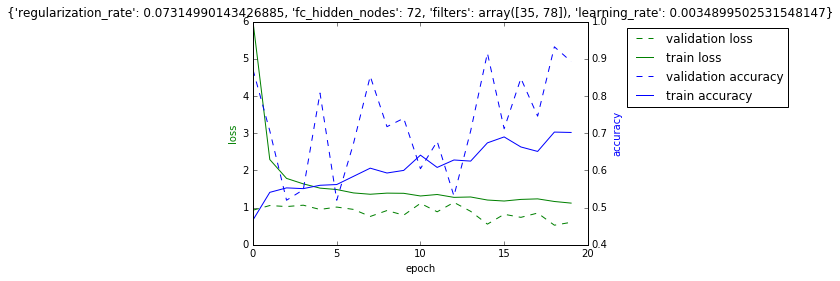

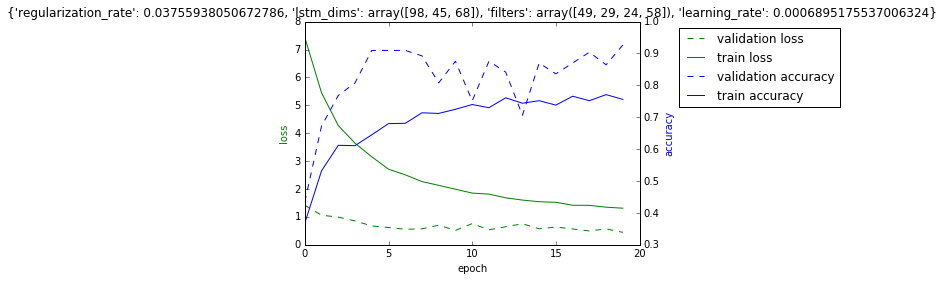

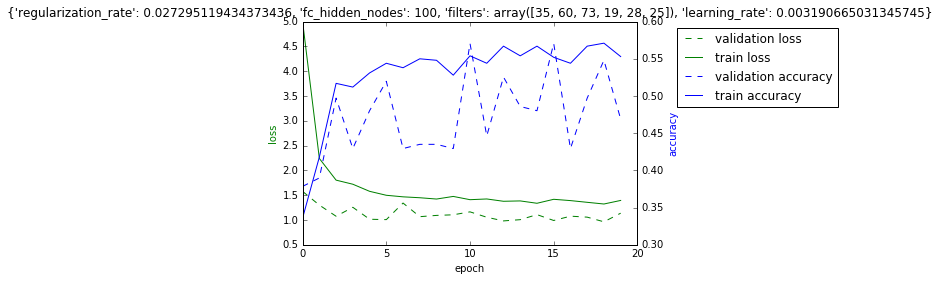

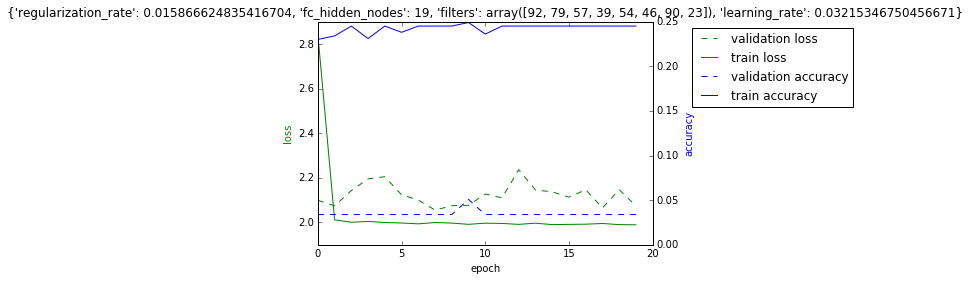

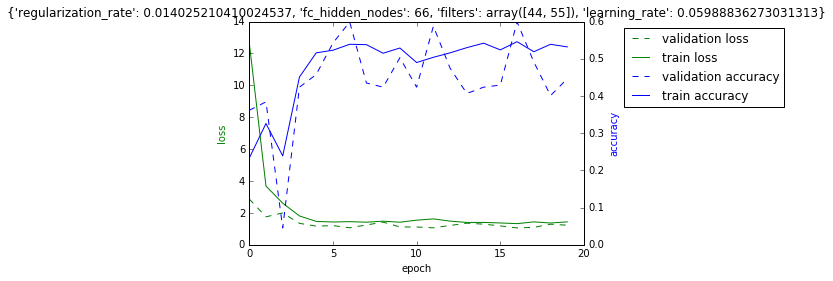

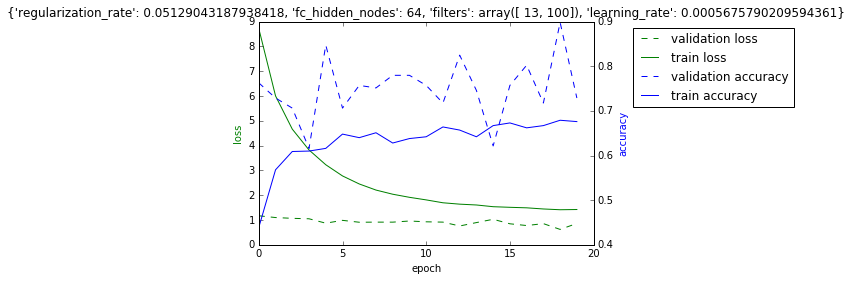

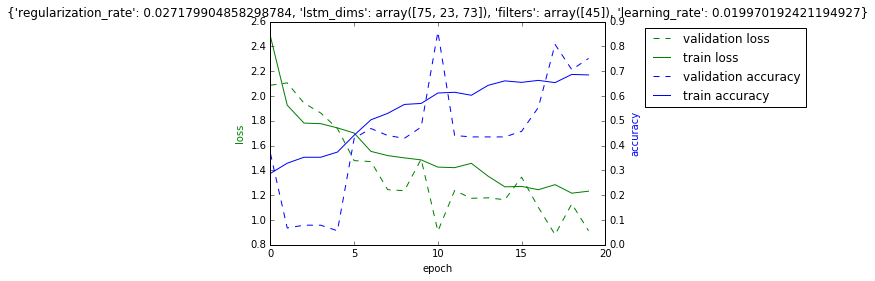

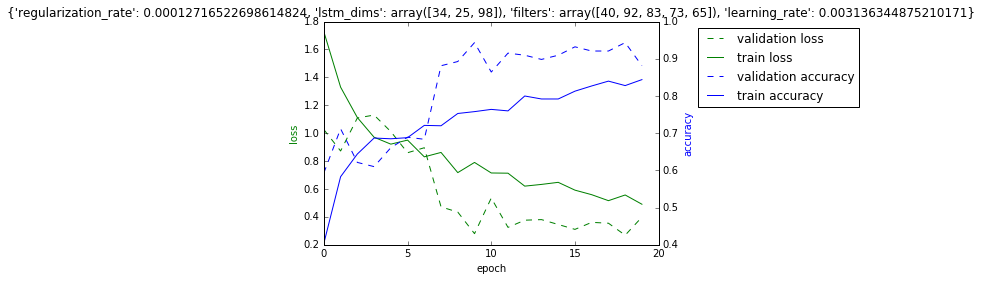

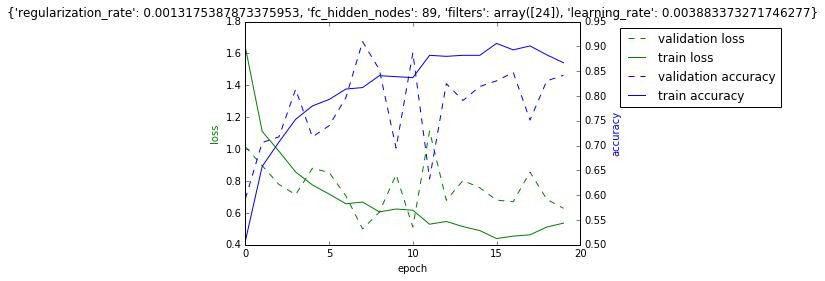

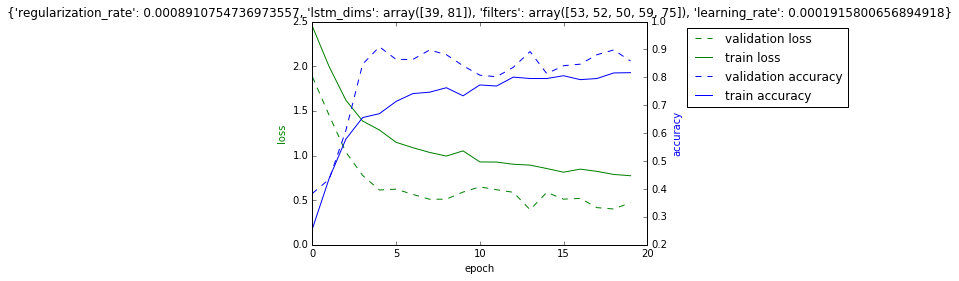

In [76]:
%%time
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [77]:
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_loss,val_acc,val_loss
0,"{'regularization_rate': 0.07314990143426885, '...",0.702,1.120796,0.892655,0.604947
1,"{'regularization_rate': 0.03755938050672786, '...",0.756,1.311860,0.926554,0.447240
2,"{'regularization_rate': 0.027295119434373436, ...",0.553,1.394430,0.468927,1.137250
3,"{'regularization_rate': 0.015866624835416704, ...",0.245,1.989714,0.033898,2.074685
4,"{'regularization_rate': 0.014025210410024537, ...",0.532,1.436982,0.446328,1.228995
5,"{'regularization_rate': 0.05129043187938418, '...",0.676,1.422658,0.728814,0.860581
6,"{'regularization_rate': 0.027179904858298784, ...",0.685,1.232375,0.751412,0.913117
7,{'regularization_rate': 0.00012716522698614824...,0.844,0.490767,0.881356,0.398414
8,"{'regularization_rate': 0.0013175387873375953,...",0.867,0.535902,0.841808,0.628654
9,"{'regularization_rate': 0.0008910754736973557,...",0.817,0.773638,0.858757,0.471280


In [78]:
results.to_csv(datapath+'results.csv')

## Train the best model for real

In [79]:
best_model_index = np.argmax(val_accuracies)
#best_model_index = 3

In [80]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

1 DeepConvLSTM {'regularization_rate': 0.03755938050672786, 'lstm_dims': array([98, 45, 68]), 'filters': array([49, 29, 24, 58]), 'learning_rate': 0.0006895175537006324}


We make a copy of the model, to start training from fresh.

In [81]:
best_params

{'filters': array([49, 29, 24, 58]),
 'learning_rate': 0.0006895175537006324,
 'lstm_dims': array([98, 45, 68]),
 'regularization_rate': 0.03755938050672786}

In [93]:
best_params = {'filters': np.array([128, 128, 128, 128, 128, 128]),
 'learning_rate': 0.0006895175537006324,
 'lstm_dims': np.array([128, 128, 128]),
 'regularization_rate': 0.03755938050672786}

In [94]:
best_model_copy = modelgen.generate_DeepConvLSTM_model(X_train.shape, num_classes, best_params['filters'], 
                    best_params['lstm_dims'], best_params['learning_rate'], best_params['regularization_rate'])

In [95]:
best_model_copy.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_36 (BatchNormali(None, 20, 3)       6           batchnormalization_input_36[0][0]
____________________________________________________________________________________________________
reshape_41 (Reshape)               (None, 1, 20, 3)    0           batchnormalization_36[0][0]      
____________________________________________________________________________________________________
convolution2d_45 (Convolution2D)   (None, 128, 20, 3)  512         reshape_41[0][0]                 
____________________________________________________________________________________________________
activation_138 (Activation)        (None, 128, 20, 3)  0           convolution2d_45[0][0]           
___________________________________________________________________________________________

We're going to train the model on the complete data set, and save the model after each epoch

In [96]:
nr_epochs = 50
datasize = X_train.shape[0]
history = best_model_copy.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              nb_epoch=nr_epochs, validation_data=(X_val, y_val_binary), 
              callbacks=[keras.callbacks.ModelCheckpoint(datapath+'weights.{epoch:02d}-{val_loss:.2f}.hdf5')])

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/50
1065/1065 [==============================] - 19s - loss: 23.7860 - acc: 0.4779 - val_loss: 1.2715 - val_acc: 0.5085
Epoch 2/50
1065/1065 [==============================] - 20s - loss: 13.5782 - acc: 0.6113 - val_loss: 0.6436 - val_acc: 0.8927
Epoch 3/50
1065/1065 [==============================] - 21s - loss: 9.0784 - acc: 0.6507 - val_loss: 0.9251 - val_acc: 0.7514
Epoch 4/50
1065/1065 [==============================] - 20s - loss: 6.7845 - acc: 0.7221 - val_loss: 0.9857 - val_acc: 0.7119
Epoch 5/50
1065/1065 [==============================] - 20s - loss: 5.6872 - acc: 0.7258 - val_loss: 0.4024 - val_acc: 0.9209
Epoch 6/50
1065/1065 [==============================] - 20s - loss: 4.9343 - acc: 0.7596 - val_loss: 0.5825 - val_acc: 0.8588
Epoch 7/50
1065/1065 [==============================] - 20s - loss: 4.6673 - acc: 0.7089 - val_loss: 0.5671 - val_acc: 0.8701
Epoch 8/50
1065/1065 [==============================] - 20s - loss: 4

If we plot the training process, we see that the model is probably already overfitting in the first epoch. 

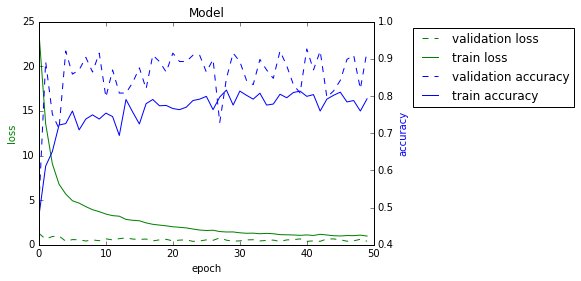

In [97]:
find_architecture.plotTrainingProcess(history)

In [87]:
model_copy.evaluate(X_train, y_train_binary)

NameError: name 'model_copy' is not defined

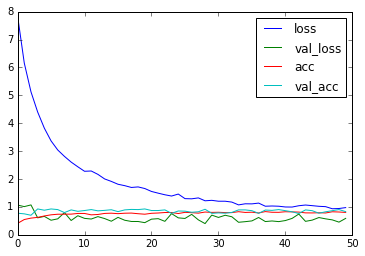

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

## Inspect model predictions

In [78]:
datasize = X_val.shape[0]
probs = best_model_copy.predict_proba(X_val[:datasize,:,:],batch_size=1)
probs

2007/2007 [==============================] - 53s    


array([[  9.96852517e-01,   2.25957949e-03,   6.83049928e-09, ...,
          2.39043184e-05,   8.74882880e-06,   6.42670842e-04],
       [  9.96783733e-01,   2.32967618e-03,   6.68127242e-09, ...,
          2.32075290e-05,   8.67394738e-06,   6.47695037e-04],
       [  9.96741891e-01,   2.37100990e-03,   6.61404664e-09, ...,
          2.27409728e-05,   8.74455418e-06,   6.54084259e-04],
       ..., 
       [  1.07261769e-07,   2.62271325e-08,   3.49303404e-13, ...,
          2.91905326e-06,   2.34428637e-08,   1.10417325e-03],
       [  3.20605693e-07,   2.30440822e-08,   4.46437700e-13, ...,
          4.32447996e-06,   3.14905577e-08,   3.98514839e-03],
       [  2.58805084e-08,   1.29984796e-08,   3.77176182e-14, ...,
          8.23153755e-07,   2.07322359e-09,   1.71252832e-04]])

In [79]:
len(best_model.layers)

10

In [82]:
best_model_copy.layers[0].get_weights()

[array([ 1.05805969,  1.08182418,  1.05226934,  1.11985362,  1.11457896,
         1.08258474,  1.0675174 ,  1.09842944,  1.04272151], dtype=float32),
 array([-0.01621632,  0.00915477,  0.03112106, -0.00480812, -0.04024399,
         0.02938126,  0.02135731,  0.02876085,  0.02071398], dtype=float32),
 array([-5.03031445,  4.6670599 ,  3.88478112,  9.46627522,  0.05378294,
        -2.32858896,  0.26191753,  7.91399288, -1.74101698], dtype=float32),
 array([ 6.4479332 ,  6.31256723,  4.06258011,  6.53865671,  8.00042725,
         3.90192032,  1.78485167,  4.96417904,  4.87879181], dtype=float32)]

In [83]:
from keras import backend as K

# with a Sequential model
get_dens_layer_output = K.function([best_model_copy.layers[0].input, K.learning_phase()],
                                  [best_model_copy.layers[0].output])
layer_output = get_dens_layer_output([X_val, 0])[0]
layer_output

array([[[  9.14543152e-01,  -5.22749007e-01,   1.20961297e+00, ...,
           1.27866900e+00,  -1.36577868e+00,   2.07329273e+00],
        [  8.51596296e-01,  -4.23463970e-01,   1.41696489e+00, ...,
           9.61874366e-01,  -1.32358003e+00,   2.09593701e+00],
        [  8.29028249e-01,  -3.18831891e-01,   1.48567891e+00, ...,
           6.45163417e-01,  -1.36463904e+00,   2.12711763e+00],
        ..., 
        [  8.33073676e-01,  -5.33392504e-02,   1.30498242e+00, ...,
           3.66124213e-01,  -1.23794603e+00,   2.32352901e+00],
        [  8.69708896e-01,  -4.08081971e-02,   1.27587688e+00, ...,
           3.05379510e-01,  -1.22057402e+00,   2.41411233e+00],
        [  8.45695853e-01,  -8.58338997e-02,   1.32538247e+00, ...,
           3.95880163e-01,  -1.22073758e+00,   2.40642452e+00]],

       [[  8.95305097e-01,  -1.51136845e-01,   1.34682620e+00, ...,
           2.57436574e-01,  -1.26235223e+00,   2.38910627e+00],
        [  8.70019019e-01,  -1.90006688e-01,   1.33645797e+0

In [26]:
best_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_5 (BatchNormal(None, 512, 9)        18          batchnormalization_input_5[0][0] 
____________________________________________________________________________________________________
convolution1d_10 (Convolution1D) (None, 512, 98)       2744        batchnormalization_5[0][0]       
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 512, 98)       0           convolution1d_10[0][0]           
____________________________________________________________________________________________________
convolution1d_11 (Convolution1D) (None, 512, 67)       19765       activation_18[0][0]              
___________________________________________________________________________________________

In [84]:
score_val = best_model_copy.evaluate(X_val, y_val_binary, verbose=True)
score_val

2007/2007 [==============================] - 19s    


[0.21868674527978088, 0.93622321873442949]

## Test on Testset

In [ ]:
score_test = best_model.evaluate(X_test, y_test_binary, verbose=False)
print('Score of best model: ' + str(score_test))